In [2]:
library(tidyverse)
library(broom)
library(remotes)

data <- read_csv("/kaggle/input/cytof-one-experiment/cytof_one_experiment.csv")
head(data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 50000 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (35): NKp30, KIR3DL1, NKp44, KIR2DL1, GranzymeB, CXCR6, CD161, KIR2DS4, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


NKp30,KIR3DL1,NKp44,KIR2DL1,GranzymeB,CXCR6,CD161,KIR2DS4,NKp46,NKG2D,⋯,CD16,TNFa,ILT2,Perforin,KIR2DL2.L3.S2,KIR2DL3,NKG2A,NTB.A,CD56,INFg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1875955,3.6156932,-0.5605694,-0.2936654,2.477893,-0.14470053,-0.3152872,1.94497046,4.0818316,2.6200784,⋯,3.9951417,0.90143498,-0.386027758,6.431983,1.22710292,2.660657999,-0.5220613,4.348923,2.897523,-0.3841108
1.0348518,1.7001820,-0.2889611,-0.4798280,3.261016,-0.03392447,-0.4112129,3.80251714,3.7339299,-0.4832788,⋯,4.4082309,1.93590153,2.983874845,6.814827,-0.04141081,3.841304627,4.6771149,3.474335,3.782870,2.7186296
2.9996398,6.1411419,1.9032606,0.4823102,4.277562,1.94654156,-0.5022347,-0.32010171,4.5594631,-0.5069090,⋯,6.0023244,-0.02336999,-0.521099944,5.099562,-0.16705075,-0.009694396,-0.4730573,5.634341,5.701186,2.5321763
4.2998594,-0.2211586,0.2425707,-0.4831267,3.351808,0.92622195,3.8772370,-0.16969487,4.4831486,1.9272290,⋯,5.8238698,-0.60793749,-0.043783559,5.841797,-0.51753289,-0.592990887,-0.4059049,4.598021,6.065672,2.4564582
-0.4386448,-0.5035892,-0.1526320,0.7506128,3.194145,-0.05893640,1.0907379,-0.05033025,0.8379358,-0.4581674,⋯,4.0122501,-0.61989100,1.182703288,4.888777,-0.36251589,-0.398123704,-0.5440881,3.606101,1.966169,3.1470092
2.0883050,-0.3992646,3.4550676,-0.5200856,4.345102,-0.36434277,-0.5705891,-0.45033591,4.0550848,3.4283565,⋯,-0.5832926,0.14311030,-0.003258955,3.952542,-0.20194392,-0.202592720,3.8882776,2.346275,6.473243,2.8282987


In [3]:
summary(data)

     NKp30            KIR3DL1             NKp44            KIR2DL1       
 Min.   :-0.6733   Min.   :-0.67380   Min.   :-0.6739   Min.   :-0.6739  
 1st Qu.: 2.8238   1st Qu.:-0.35515   1st Qu.:-0.2904   1st Qu.:-0.1282  
 Median : 3.7796   Median :-0.02122   Median : 0.7593   Median : 1.7049  
 Mean   : 3.5948   Mean   : 1.05674   Mean   : 1.2652   Mean   : 1.7765  
 3rd Qu.: 4.5907   3rd Qu.: 2.15491   3rd Qu.: 2.6436   3rd Qu.: 3.2782  
 Max.   : 7.8212   Max.   : 7.36360   Max.   : 7.2905   Max.   : 7.9213  
   GranzymeB          CXCR6              CD161            KIR2DS4       
 Min.   :-0.672   Min.   :-0.67376   Min.   :-0.6738   Min.   :-0.6739  
 1st Qu.: 2.951   1st Qu.:-0.36745   1st Qu.:-0.2929   1st Qu.:-0.2043  
 Median : 3.683   Median :-0.05814   Median : 0.7257   Median : 1.7103  
 Mean   : 3.457   Mean   : 0.54687   Mean   : 1.0596   Mean   : 1.7629  
 3rd Qu.: 4.242   3rd Qu.: 1.35477   3rd Qu.: 2.3461   3rd Qu.: 3.4708  
 Max.   : 6.185   Max.   : 4.76702   Max.   

In [4]:
long_data <- pivot_longer(
  data,
  cols = everything(),
  names_to = "Protein",
  values_to = "Amount"
)
long_data

Protein,Amount
<chr>,<dbl>
NKp30,0.1875955
KIR3DL1,3.6156932
NKp44,-0.5605694
KIR2DL1,-0.2936654
GranzymeB,2.4778929
CXCR6,-0.1447005
CD161,-0.3152872
KIR2DS4,1.9449705
NKp46,4.0818316


In [5]:
?group_by


group_by {dplyr},R Documentation
.data,"A data frame, data frame extension (e.g. a tibble), or a lazy data frame (e.g. from dbplyr or dtplyr). See Methods, below, for more details."
...,"In group_by(), variables or computations to group by. Computations are always done on the ungrouped data frame. To perform computations on the grouped data, you need to use a separate mutate() step before the group_by(). Computations are not allowed in nest_by(). In ungroup(), variables to remove from the grouping."
.add,"When FALSE, the default, group_by() will override existing groups. To add to the existing groups, use .add = TRUE. This argument was previously called add, but that prevented creating a new grouping variable called add, and conflicts with our naming conventions."
.drop,Drop groups formed by factor levels that don't appear in the data? The default is TRUE except when .data has been previously grouped with .drop = FALSE. See group_by_drop_default() for details.
x,A tbl()


In [6]:
stats <- long_data %>%
    group_by(Protein) %>% 
    summarize(
        median = median(Amount, na.rm = TRUE),
        mad = mad(Amount, na.rm = TRUE)
             )
stats


Protein,median,mad
<chr>,<dbl>,<dbl>
CD107a,-0.122299723,0.6086976
CD16,5.122980165,0.8744054
CD161,0.725693301,1.6882296
CD2,3.945378908,1.6770427
CD4,-0.203649896,0.3953896
CD56,5.710790329,0.9981358
CD57,3.070920414,1.9868804
CD69,4.588542784,1.0186438
CD8,2.400718137,2.2887240


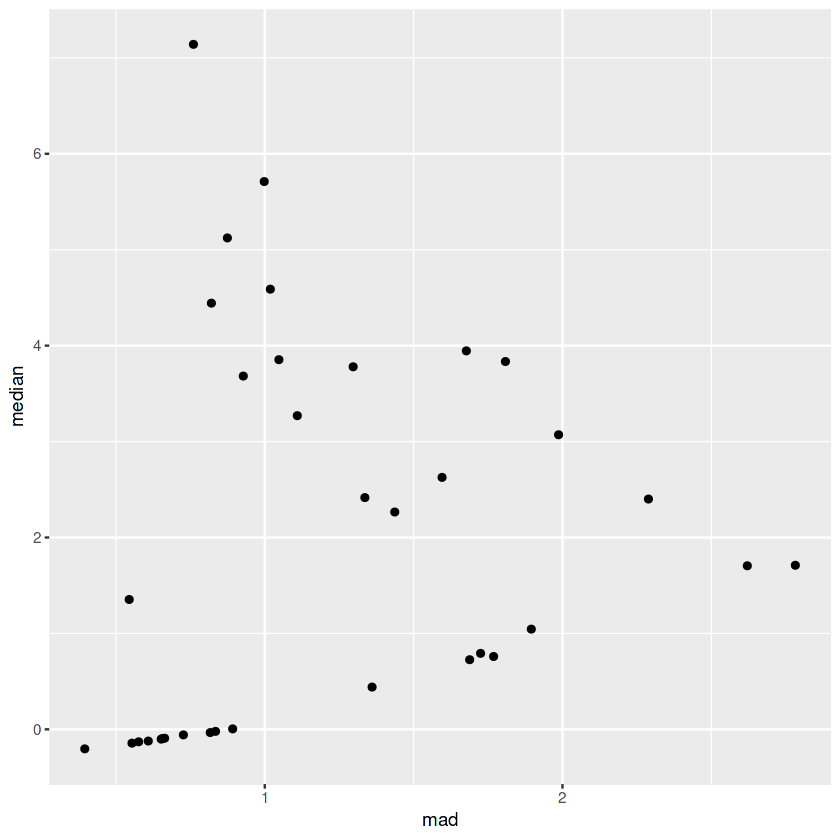

In [7]:
ggplot(stats, aes(x = mad, y = median)) +
    geom_point()

The plot above shows the attributes of heteroscedasticity or the lack of a constant variance. The points show a non-horizontal, non-constant trendline in the mad vs median plot as shown below.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


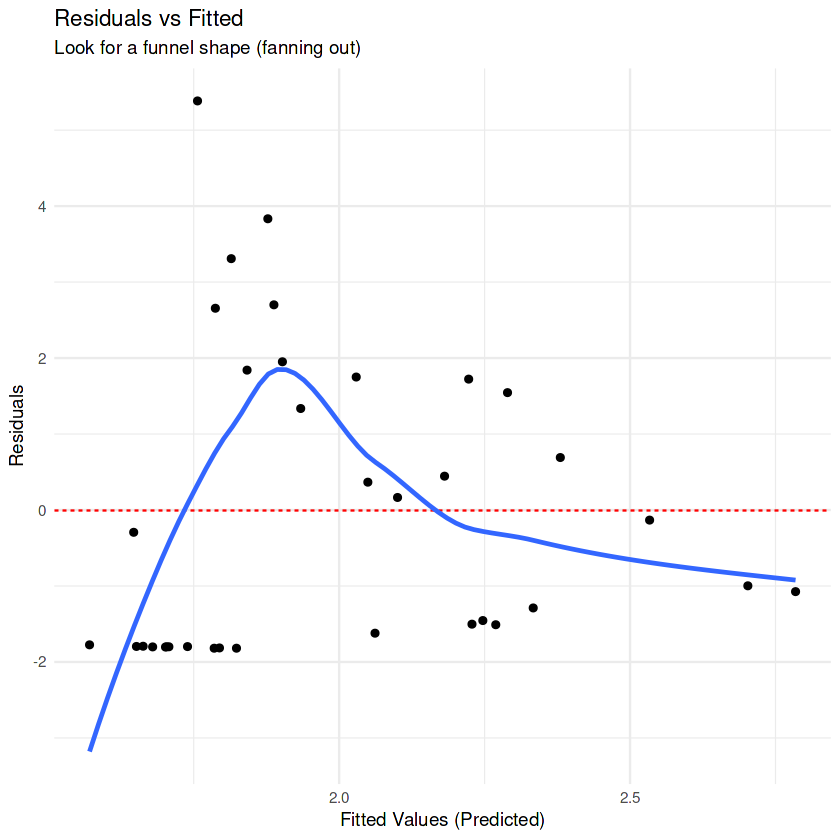

In [8]:
model <- lm(median ~ mad, data = stats)
model_data <- augment(model)

ggplot(model_data, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  geom_smooth(se = FALSE) +
  labs(title = "Residuals vs Fitted",
       subtitle = "Look for a funnel shape (fanning out)",
       x = "Fitted Values (Predicted)",
       y = "Residuals") +
  theme_minimal()

Data transformations must be applied before applying statistical tools with the assumption of homoscedasticity such as linear regression and ANOVA.

Kaggle could not seem to install dcl-docs/dcldata. However, the library was installed in Rstudio. In order to acquire the detaset, obtained it through exporting the dataset from Rstudio to a CSV file and then attaching the file in Kaggle.

In [10]:
data2 <- read_csv("/kaggle/input/example-gymnastics-2/example_gymnastics_2.csv")
data2

Rows: 3 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): country
dbl (4): vault_2012, floor_2012, vault_2016, floor_2016

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


country,vault_2012,floor_2012,vault_2016,floor_2016
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
United States,48.132,45.366,46.866,45.999
Russia,46.366,41.599,45.733,42.032
China,44.266,40.833,44.332,42.066


In [12]:
data2_long <- data2 %>%
  pivot_longer(
    cols = -country,                
    names_to = c("event", "year"),   
    names_sep = "_",                 
    values_to = "score"              
  )

data2_long

country,event,year,score
<chr>,<chr>,<chr>,<dbl>
United States,vault,2012,48.132
United States,floor,2012,45.366
United States,vault,2016,46.866
United States,floor,2016,45.999
Russia,vault,2012,46.366
Russia,floor,2012,41.599
Russia,vault,2016,45.733
Russia,floor,2016,42.032
China,vault,2012,44.266
